<a href="https://colab.research.google.com/github/CarlosPuenteL/Python-ML/blob/main/Neuronal%20network%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Run this!
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
import keras
print('keras using %s backend'%keras.backend.backend())
import pandas as pd
import numpy as np
import matplotlib.pyplot as graph
%matplotlib inline
graph.rcParams['figure.figsize'] = (15,5)
graph.rcParams["font.family"] = 'DejaVu Sans'
graph.rcParams["font.size"] = '12'
graph.rcParams['image.cmap'] = 'rainbow'

keras using tensorflow backend


In [2]:
# This loads the dataset
dataset = pd.read_csv('dog_data.csv')

###
# REPLACE <printDataHere> with print(dataset.head()) TO PREVIEW OUR DATASET
###
print(dataset.head())
###

# This tells us the shape of the data set
print("Shape of data set:", dataset.shape)

# Defines the feature dataframe
features = dataset.drop(['breed'], axis = 1)

    age  weight  height  breed
0  9.47    6.20    6.80      1
1  7.97    8.63    8.92      0
2  9.51    6.40    5.78      1
3  8.96    8.82    6.28      2
4  8.37    3.89    5.62      1
Shape of data set: (200, 4)


In [3]:
from sklearn.preprocessing import OneHotEncoder

# This sets the  labels (numerical)
labels = np.array(dataset['breed'])

###
# REPLACE THE <addLabels> BELOW WITH labels
###
onehot = OneHotEncoder(sparse = False).fit_transform(np.transpose([labels]))
###

print(onehot[:5])

[[0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]


In [4]:
# Run this! This sets up our training and test sets.

# This takes the first 160 examples for our training set
train_X = features.values[:160]
train_Y = onehot[:160]

# This takes the last 40 examples of the 200 for our test set
test_X = features.values[160:]
test_Y = onehot[160:]

In [7]:
# Set a randomisation seed for replicatability.
np.random.seed(6)


# This creates our base model for us to add to
###
# REPLACE THE <addSequential> BELOW WITH Sequential()
###
model = keras.models.Sequential()
###

###
# REPLACE THE <inputNodes>, <hiddenNotes1>, <hiddenNotes2>, <outputNotes> BELOW WITH THE APPROPRIATE NUMBERS OF NODES AS DESCRIBED ABOVE
###
structure = [3, 3, 3, 3]
###

# Input layer + hidden layer 1
model.add(keras.layers.Dense(units=structure[1], input_dim = structure[0], activation = 'relu'))

# Hidden layer 2
model.add(keras.layers.Dense(units=structure[2], activation = 'relu'))

# Output layer - note that the activation function is softmax
# Softmax will predict a category and provide a value for how likely this is the correct prediction.
model.add(keras.layers.Dense(units=structure[3], activation = tf.nn.softmax))

print("Layer structure:", structure)

Layer structure: [3, 3, 3, 3]


In [11]:
# Let's compile the model

###
# REPLACE THE <addLoss> WITH 'categorical_crossentropy', <addOptimizer> WITH 'sgd', AND <addMetric> with 'accuracy' (INCLUDING THE QUOTES)
###
model.compile(loss = 'categorical_crossentropy', optimizer = 'sgd', metrics = ['accuracy'])
###

# Time to fit the model
print('Starting training')

###
# REPLACE THE <addTrainX> WITH train_X AND <addTrainY> WITH train_Y
###
training_stats = model.fit(train_X, train_Y, batch_size = 1, epochs = 24, verbose = 0)
###

print('Training finished')
print('Training Evaluation: loss = %0.3f, accuracy = %0.2f%%' 
      %(training_stats.history['loss'][-1], 100 * training_stats.history['accuracy'][-1]))

Starting training
Training finished
Training Evaluation: loss = 1.101, accuracy = 28.12%


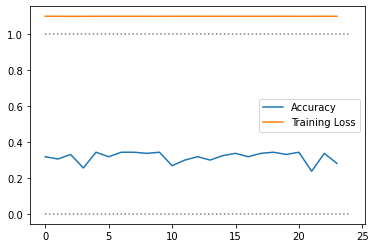

In [13]:
# Run this!

accuracy, = graph.plot(training_stats.history['accuracy'],label = 'Accuracy')
training_loss, = graph.plot(training_stats.history['loss'],label = 'Training Loss')


graph.legend(handles = [accuracy,training_loss])
loss = np.array(training_stats.history['loss'])
xp = np.linspace(0, loss.shape[0], 10 * loss.shape[0])
graph.plot(xp, np.full(xp.shape, 1), c = 'k', linestyle = ':', alpha = 0.5)
graph.plot(xp, np.full(xp.shape, 0), c = 'k', linestyle = ':', alpha = 0.5)
graph.show()

In [14]:
###
# REPLACE <addTestX> WITH test_X AND <addTestY> with test_Y
###
evaluation = model.evaluate(test_X, test_Y, verbose=0)
###

print('Test Set Evaluation: loss = %0.6f, accuracy = %0.2f' %(evaluation[0], 100*evaluation[1]))

Test Set Evaluation: loss = 1.103517, accuracy = 25.00


In [15]:
###
# REPLACE THE <addNumber> BELOW WITH A WHATEVER NUMBERS YOU WANT, e.g. [9, 7, 7]
###
# [age, weight, height]
new_sample = [7, 9, 9]
###

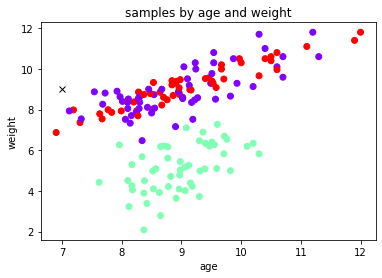

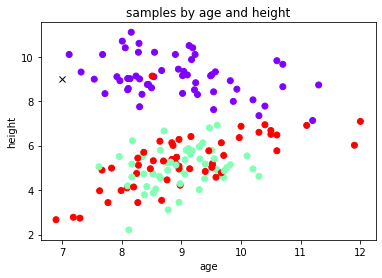

In [16]:
# Plots out the age-weight relationship

###
# REPLACE THE <addNewSample> BELOW WITH new_sample
###
graph.plot(new_sample[0], new_sample[1], 'ko', marker='x')
###

graph.scatter(train_X[:,0], train_X[:,1], c = labels[:160])
graph.title('samples by age and weight')
graph.xlabel('age')
graph.ylabel('weight')
graph.show()

# Plot out the age-height relationship

###
# REPLACE THE <addNewSample> BELOW WITH new_sample
###
graph.plot(new_sample[0], new_sample[2], 'ko', marker='x')
###

graph.scatter(train_X[:,0], train_X[:,2], c = labels[:160])
graph.title('samples by age and height')
graph.xlabel('age')
graph.ylabel('height')
graph.show()

In [17]:
###
# REPLACE THE <addNewSample> BELOW WITH new_sample
###
predicted = model.predict(np.array([new_sample]))
print('Breed prediction for %s:' %(new_sample))
###

print(np.around(predicted[0],2))
print('Breed %s, with %i%% certainty.' %(np.argmax(predicted), np.round(100 * predicted[:, np.argmax(predicted)][0])))

Breed prediction for [7, 9, 9]:
[0.35 0.33 0.33]
Breed 0, with 35% certainty.


In [18]:
#Breed 0 should be purple, breed 1 should be green, and breed 2 should be red.